# Logistic Regression (Binary Classification)

I started by importing the necessary libraries like pandas, numpy, and os, which helped me handle CSV files, work with numerical data, and manage file operations. Then, I set the folder path where all the CSV files were stored. To keep things organized, I created an empty list to store DataFrames for each file, so I could merge them into one dataset later.

Next, I looped through all the files in the folder and grabbed their names, which allowed me to read all the datasets automatically instead of specifying each file manually. I split the data into chunks of 1000 samples and created two lists—one for storing the processed data chunks and another for their labels.  

I then processed the data in steps of 1000 samples, reshaping each chunk into a row format that could be used for training. Labels were assigned based on the file names, classifying the data as either "healthy" or "unhealthy," along with details about specific faults. Finally, I combined all the chunks into a structured DataFrame and saved it as a CSV file to use for training and testing a logistic regression model.

In [ ]:
import pandas as pd
import numpy as np
import os

# Set the folder path containing all CSV files
folder_path = 'D:\\ML\\data'

# Create an empty list to store DataFrames for each file
output_dfs = []

# Loop through all CSV files in the folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.csv'):
        # Construct the full file path
        file_path = os.path.join(folder_path, file_name)
        print(file_path)
        # Extract the file name without extension
        file_name_without_extension = file_name.split("-")[0]

        # Initialize labels_list for each file
        labels_list = []

        # Assign a label based on health condition
        label = 'healthy' if 'healthy' in file_name_without_extension.lower() else 'unhealthy'
        labels_list.append(label)

        # Read the CSV file
        df = pd.read_csv(file_path)

        # Extract the 'Current-A' column
        current_a_data = df[' Current-A']

        # Define the chunk size
        chunk_size = 1000

        # Calculate the number of complete chunks
        num_complete_chunks = len(current_a_data) // chunk_size

        # Create a list to store transposed chunks
        transposed_chunks_list = []

        # Process the data in complete chunks
        for i in range(0, num_complete_chunks * chunk_size, chunk_size):
            # Take a chunk of data
            chunk = current_a_data[i:i + chunk_size]

            # Transpose the chunk into rows
            transposed_chunk = chunk.values.reshape(1, -1)  # 1 row, 143*1000 columns

            # Append the transposed chunk to the list
            transposed_chunks_list.append(transposed_chunk)

        # Concatenate the list of transposed chunks along a new axis (axis=0)
        output_array = np.concatenate(transposed_chunks_list, axis=0)

        # Create a DataFrame from the concatenated array with a 'Label' column
        output_df = pd.DataFrame(data=output_array, columns=[f'Value_{i}' for i in range(output_array.shape[1])])
        output_df['Label'] = label

        # Append the DataFrame to the list
        output_dfs.append(output_df)

# Concatenate all DataFrames along a new axis (axis=0)
final_output_df = pd.concat(output_dfs, axis=0, ignore_index=True)

# Save the final DataFrame to a new CSV file
final_output_file_path = 'D:\\output\\final_output_with_labels.csv'
final_output_df.to_csv(final_output_file_path, index=False)

# Print a message to indicate that the final file has been saved
print(f'Final transposed data with labels saved to {final_output_file_path}')


I checked the data for any missing values and removed the rows that had them. This made sure the dataset was clean and ready to use.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r"D:\\ML\\output\\final_output_with_labels.csv"
df = pd.read_csv(file_path)

# Check for null values in the DataFrame
null_values =df.isnull().sum()

# Display or print the null values
print("Null Values:\n", null_values)


Null Values:
 Value_0      1
Value_1      1
Value_2      1
Value_3      1
Value_4      1
            ..
Value_996    2
Value_997    2
Value_998    2
Value_999    2
Label        0
Length: 1001, dtype: int64


In [3]:
df = df.dropna(axis = 0)
print(df.isnull().sum(axis = 0))


Value_0      0
Value_1      0
Value_2      0
Value_3      0
Value_4      0
            ..
Value_996    0
Value_997    0
Value_998    0
Value_999    0
Label        0
Length: 1001, dtype: int64


I wrote a code to build a logistic regression model that classifies the data as either "healthy" or "unhealthy." First, I loaded the dataset from a CSV file using pandas and split it into features (X) and labels (y). I converted the labels into binary values, where 1 represented "healthy" and 0 represented everything else. After that, I divided the data into an 80% training set and a 20% test set.  

The model was trained using gradient descent, and I used the sigmoid function to make predictions. This function is super helpful because logistic regression predicts probabilities, and the sigmoid output represents the probability of the positive class (in this case, "healthy"). If the probability was above 0.5, the model classified it as 1 ("healthy"), and if it was 0.5 or below, it classified it as 0 ("unhealthy").  

I started by initializing the weights and bias to zero and updated them over 1000 iterations to minimize the error. Finally, I tested the trained model on the test data and calculated its accuracy by comparing the predicted results with the actual labels.

In [ ]:
import pandas as pd
import numpy as np

file_path = r"D:\\ML\\output\\final_output_with_labels.csv"
df = pd.read_csv(file_path)

# Split the data into features and target
X = df.drop('Label', axis=1)
y = df['Label'].apply(lambda x: 1 if x == 'healthy' else 0) # Convert 'Label' to binary

# Split the data into training and test sets
train_idx = int(len(X)*0.8)
X_train, X_test = X[:train_idx], X[train_idx:]
y_train, y_test = y[:train_idx], y[train_idx:]

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Initialize weights and bias
weights = np.zeros(X_train.shape[1])
bias = 0

# Train the model
learning_rate = 0.0001
num_iterations = 1000

for _ in range(num_iterations):
    z = np.dot(X_train, weights) + bias
    y_pred = sigmoid(z)
    gradient_w = np.dot(X_train.T, (y_pred - y_train)) / y_train.size
    gradient_b = np.sum(y_pred - y_train) / y_train.size
    weights -= learning_rate * gradient_w
    bias -= learning_rate * gradient_b

# Make predictions
test_predictions = np.where(sigmoid(np.dot(X_test, weights) + bias) > 0.5, 1, 0)

# Evaluate the model
accuracy = np.mean(test_predictions == y_test)
print("Model Accuracy: ", accuracy)


Model Accuracy:  0.8878143133462283


First, I calculated sensitivity (how well the model detects positive cases) and specificity (how well it detects negative cases) for both classes: "healthy" and "unhealthy." Sensitivity measures the proportion of actual positives correctly predicted, while specificity measures the proportion of actual negatives correctly predicted.  

Then, I used `classification_report` from sklearn to calculate overall metrics like accuracy, precision, recall, and the F1 score. I also averaged the sensitivity and specificity across both classes to get a better understanding of the model’s performance. This gave me a clear idea of how well the model was working and whether it was balanced in identifying both "healthy" and "unhealthy" cases.

In [5]:
from sklearn.metrics import classification_report


# Calculate sensitivity and specificity for each class
sensitivity_specificity = []
for class_label in np.unique(y_test):
    true_positives = np.sum((test_predictions == class_label) & (y_test == class_label))
    true_negatives = np.sum((test_predictions != class_label) & (y_test != class_label))
    false_positives = np.sum((test_predictions == class_label) & (y_test != class_label))
    false_negatives = np.sum((test_predictions != class_label) & (y_test == class_label))

    sensitivity = true_positives / (true_positives + false_negatives)
    specificity = true_negatives / (true_negatives + false_positives)

    sensitivity_specificity.append((sensitivity, specificity))

# Print sensitivity and specificity for each class
for i, (sensitivity, specificity) in enumerate(sensitivity_specificity, start=1):
    print(f"Class {i}: Sensitivity = {sensitivity:.4f}, Specificity = {specificity:.4f}")

# Compute and print overall classification measures
accuracy = np.mean(test_predictions == y_test)
precision, recall, f1_score, _ = classification_report(y_test, test_predictions, zero_division=1, output_dict=True)['macro avg'].values()
sensitivity = np.mean([s for s, _ in sensitivity_specificity])
specificity = np.mean([sp for _, sp in sensitivity_specificity])

print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1_score:.4f}")
print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")


Class 1: Sensitivity = 1.0000, Specificity = 0.0000
Class 2: Sensitivity = 0.0000, Specificity = 1.0000
Accuracy: 0.8878, Recall: 0.5000, Precision: 0.9439, F1 Score: 0.4703
Sensitivity: 0.5000, Specificity: 0.5000


I use confusion matrix and ROC curve for Visualization. 

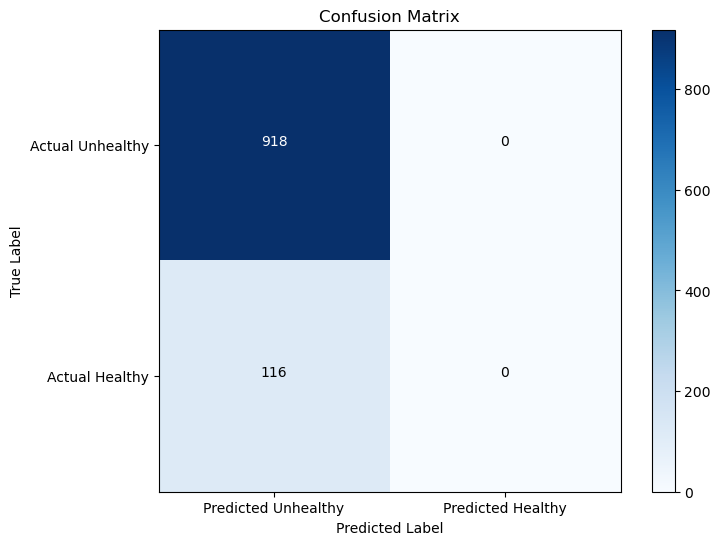

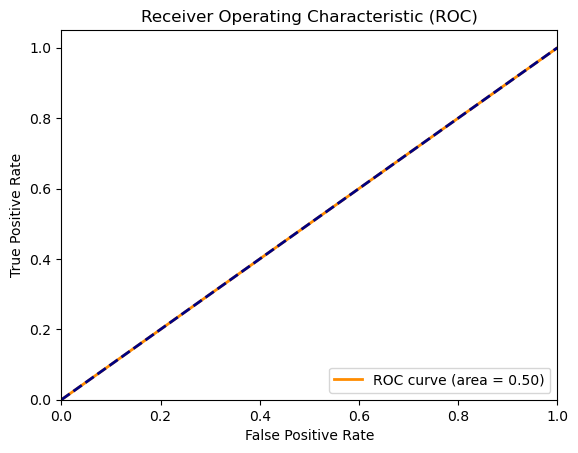

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted Unhealthy', 'Predicted Healthy'])
plt.yticks([0, 1], ['Actual Unhealthy', 'Actual Healthy'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')
plt.show()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


# Logistic Regression (Multiclass Classification)

This code processes multiple CSV files to create a dataset for multiclass classification. I first check if the folder exists and loop through the files. From each file, I take the 'Current-A' column and split it into 1000-sample chunks, reshaping each chunk into a row. Labels like "healthy" or fault types ("inner_race," "outer_race") are assigned based on the filenames. After processing all the files, I combine the chunks and labels into one DataFrame and save it as a new CSV file for training a multiclass classification model.

In [ ]:
# Multiclass Classification

import pandas as pd
import numpy as np
import os

# Set the folder path containing all CSV files
folder_path = 'D:\\ML\\data'

# Create an empty list to store DataFrames for each file
output_dfs = []

# Verify if the folder path exists
if os.path.exists(folder_path):
    # Loop through all CSV files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(folder_path, file_name)
            print(file_path)

            # Read the CSV file
            df = pd.read_csv(file_path)

            # Extract the 'Current-A' column
            current_a_data = df[' Current-A']

            # Define the chunk size
            chunk_size = 1000

            # Calculate the number of complete chunks
            num_complete_chunks = len(current_a_data) // chunk_size

            # Create a list to store transposed chunks and corresponding labels
            transposed_chunks_list = []
            labels_list = []

            # Process the data in complete chunks
            for i in range(0, num_complete_chunks * chunk_size, chunk_size):
                # Take a chunk of data
                chunk = current_a_data[i:i + chunk_size]

                # Transpose the chunk into rows
                transposed_chunk = chunk.values.reshape(1, -1)  # 1 row, 143*1000 columns

                # Append the transposed chunk to the list
                transposed_chunks_list.append(transposed_chunk)

                # Assign a label with more specific classification
                label = file_name.split("-")[0]
                if 'healthy' in label.lower():
                    label = 'healthy'
                elif 'inner' in label.lower():
                    label = f'inner_race_{label.split("inner")[-1].strip()}'
                elif 'outer' in label.lower():
                    label = f'outer_race_{label.split("outer")[-1].strip()}'
                elif 'BRB' in label:
                    label = f'broken_rotor_bar_{label.split("BRB")[-1].strip()}'
                
                labels_list.append(label)

            # Concatenate the list of transposed chunks along a new axis (axis=0)
            output_array = np.concatenate(transposed_chunks_list, axis=0)

            # Create a DataFrame from the concatenated array with a 'Label' column
            output_df = pd.DataFrame(data=output_array, columns=[f'Value_{i}' for i in range(output_array.shape[1])])
            output_df['Label'] = labels_list

            # Append the DataFrame to the list
            output_dfs.append(output_df)

    # Concatenate all DataFrames along a new axis (axis=0)
    final_output_df = pd.concat(output_dfs, axis=0, ignore_index=True)

    # Set the final output file path
    final_output_file_path = r'D:\\ML\\output2\\final_output_with_labels.csv'

    # Save the final DataFrame to the specified CSV file path
    final_output_df.to_csv(final_output_file_path, index=False)

    # Print a message to indicate that the final file has been saved
    print(f'Final transposed data with labels saved to {final_output_file_path}')
else:
    print(f"The folder path '{folder_path}' does not exist.")

Checking and droping null values.

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = r"D:\\ML\\output2\\final_output_with_labels.csv"
df = pd.read_csv(file_path)

# Check for null values in the DataFrame
null_values =df.isnull().sum()

# Display or print the null values
print("Null Values:\n", null_values)


Null Values:
 Value_0      1
Value_1      1
Value_2      1
Value_3      1
Value_4      1
            ..
Value_996    2
Value_997    2
Value_998    2
Value_999    2
Label        0
Length: 1001, dtype: int64


In [11]:
df = df.dropna(axis = 0)
print(df.isnull().sum(axis = 0))


Value_0      0
Value_1      0
Value_2      0
Value_3      0
Value_4      0
            ..
Value_996    0
Value_997    0
Value_998    0
Value_999    0
Label        0
Length: 1001, dtype: int64


I started by defining the `MySoftmaxRegression` class with methods to fit the model, predict probabilities, and make class predictions. The softmax function is used to turn the raw outputs (logits) into probabilities for each class. During training, the model calculates gradients with L2 regularization to minimize the loss and updates the weights accordingly.  

Once the training is complete, I use the model to make predictions on the test set. Before that, I preprocess the dataset by scaling the features with `StandardScaler` and encoding the labels using `LabelEncoder`. Then, I split the dataset into training and test sets using `train_test_split`. Finally, I calculate and print the model's accuracy on the test set. This process helps in building a multiclass classifier with softmax regression.

In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

class MySoftmaxRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000, regularization_strength=0.01):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.regularization_strength = regularization_strength
        self.weights = None
        self.classes = None

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X_train, y_train):
        self.classes = np.unique(y_train)
        num_classes = len(self.classes)
        m, n = X_train.shape
        self.weights = np.zeros((n, num_classes))

        for iteration in range(self.n_iterations):
            logits = X_train.dot(self.weights)
            y_proba = self.softmax(logits)
            y_one_hot = np.zeros_like(y_proba)
            y_one_hot[np.arange(len(y_train)), y_train] = 1

            # Add L2 regularization to prevent overfitting
            gradient = X_train.T.dot(y_proba - y_one_hot) / m + self.regularization_strength * self.weights
            self.weights -= self.learning_rate * gradient

    def predict_proba(self, X):
        logits = X.dot(self.weights)
        probabilities = self.softmax(logits)
        return probabilities

    def predict(self, X):
        probabilities = self.predict_proba(X)
        predicted_class = np.argmax(probabilities, axis=1)
        return predicted_class

# Assuming 'df' is your dataset
features = df.iloc[:, :-1].values  # Features
labels = df.iloc[:, -1].values  # Multiclass labels

# Scale features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Encode labels into consecutive integers starting from 0
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels_encoded, test_size=0.2, random_state=42)

# Softmax Regression for Multiclass
softmax_reg = MySoftmaxRegression(learning_rate=0.01, n_iterations=1000, regularization_strength=0.01)
softmax_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = softmax_reg.predict(X_test)

# Evaluate accuracy and other metrics
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc * 100:.2f}%")

Accuracy: 40.14%


I calculate the accuracy to see how many predictions were correct overall. Then, I calculate recall, which shows how well the model identifies the true positive cases, and precision, which tells me how good the model is at avoiding false positives. I also calculate the F1 score, which provides a balance between recall and precision.

In [13]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import numpy as np

# Assuming 'y_test' contains true labels and 'predictions' contains predicted labels

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix to derive sensitivity and specificity
conf_matrix = confusion_matrix(y_test, y_pred)
num_classes = conf_matrix.shape[0]

total_sensitivity = 0
total_specificity = 0

for i in range(num_classes):
    tp = conf_matrix[i, i]
    fn = np.sum(conf_matrix[i, :]) - tp
    fp = np.sum(conf_matrix[:, i]) - tp
    tn = np.sum(conf_matrix) - tp - fn - fp

    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0

    total_sensitivity += sensitivity
    total_specificity += specificity

    print(f"Class {i + 1}: Sensitivity = {sensitivity:.4f}, Specificity = {specificity:.4f}")

sensitivity = total_sensitivity / num_classes
specificity = total_specificity / num_classes

# Print or store the metrics for each fold
print(f"Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, F1 Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}")


Class 1: Sensitivity = 0.3220, Specificity = 0.8092
Class 2: Sensitivity = 0.0000, Specificity = 0.9713
Class 3: Sensitivity = 0.4426, Specificity = 0.5910
Class 4: Sensitivity = 0.3890, Specificity = 0.6845
Accuracy: 0.4014, Recall: 0.4014, Precision: 0.4622, F1 Score: 0.4240
Sensitivity: 0.2884, Specificity: 0.7640


I calculate the confusion matrix for the predictions and true labels, then visualizes it as a heatmap using Seaborn.

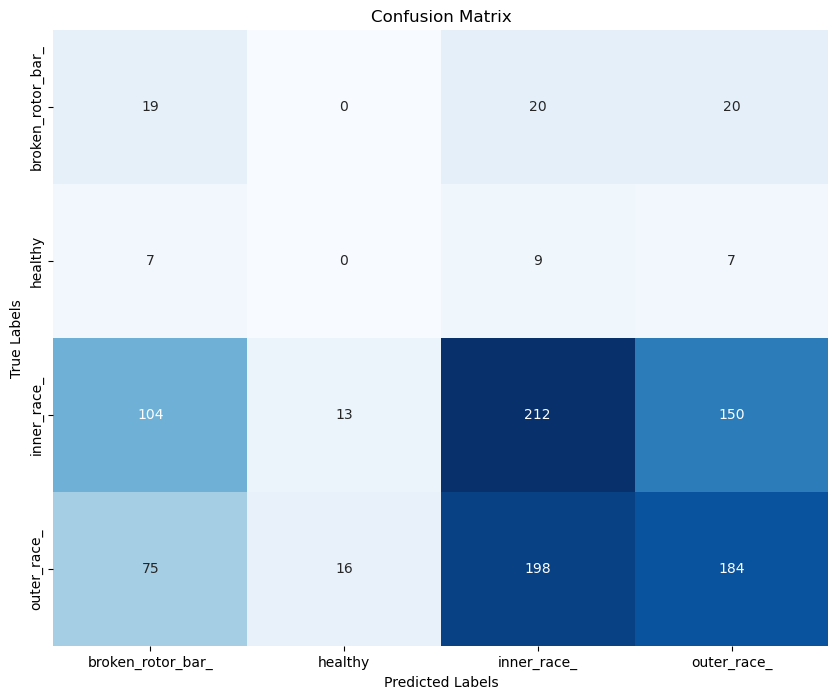

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_, cbar=False)

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Display the plot
plt.show()